In [15]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd 
from tensorflow import keras
import keras as k
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
import plotly.offline as py
import plotly.graph_objs as go
import tensorflow as tf
from IPython.display import SVG
import os
import datetime, time
import random
from keras import backend as K
from keras.regularizers import L1L2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from keras.losses import MeanSquaredError
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.model_selection import train_test_split
import warnings
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [16]:
df = pd.read_csv("gold_price_data.csv")

In [17]:
train_len = int(df.shape[0]*0.70)
train = df[0:train_len]
test = df[train_len:]

In [18]:
naive = test.copy()
naive ['Naive_forecast'] = train ['Value'][train_len - 1]

In [19]:
avg = test.copy()
avg ['Avg_forecast'] = train ['Value'].mean()

In [20]:
ses = test.copy()
ses ['Ses_forecast'] = train['Value'].mean()
model = SimpleExpSmoothing(train['Value'])
model_fit = model.fit()
ses['Ses_forecast'] = model_fit.forecast(len(test))

Naive MAPE: 37.83942784126634
Average MAPE: 68.33811776692616
SES MAPE: 37.85995461065483


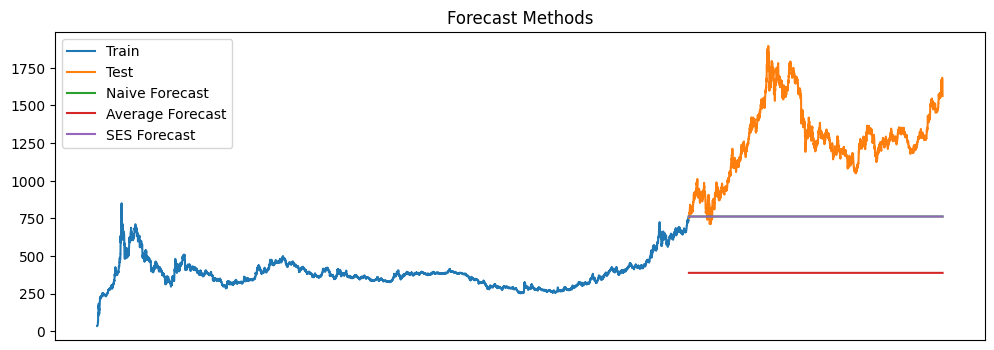

In [21]:
naive['Error'] = np.abs((test['Value'] - naive['Naive_forecast']) / test['Value']) * 100
avg['Error'] = np.abs((test['Value'] - avg['Avg_forecast']) / test['Value']) * 100
ses['Error'] = np.abs((test['Value'] - ses['Ses_forecast']) / test['Value']) * 100

naive_mape = np.mean(naive['Error'])
avg_mape = np.mean(avg['Error'])
ses_mape = np.mean(ses['Error'])

print('Naive MAPE:', naive_mape)
print('Average MAPE:', avg_mape)
print('SES MAPE:', ses_mape)

plt.figure(figsize=(12, 4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(naive['Naive_forecast'], label='Naive Forecast')
plt.plot(avg['Avg_forecast'], label='Average Forecast')
plt.plot(ses['Ses_forecast'], label='SES Forecast')
plt.legend(loc='best')
plt.title('Forecast Methods')
plt.xticks([])
plt.show()

Epoch 1/7
269/269 [==============================] - 12s 32ms/step - loss: 0.0024
Epoch 2/7
269/269 [==============================] - 8s 30ms/step - loss: 7.8988e-05
Epoch 3/7
269/269 [==============================] - 9s 35ms/step - loss: 7.3896e-05
Epoch 4/7
269/269 [==============================] - 7s 28ms/step - loss: 7.4229e-05
Epoch 5/7
269/269 [==============================] - 9s 35ms/step - loss: 6.6911e-05
Epoch 6/7
269/269 [==============================] - 8s 28ms/step - loss: 6.3710e-05
Epoch 7/7
68/68 [==============================] - 1s 10ms/step
MAPE: 13.653001699237805


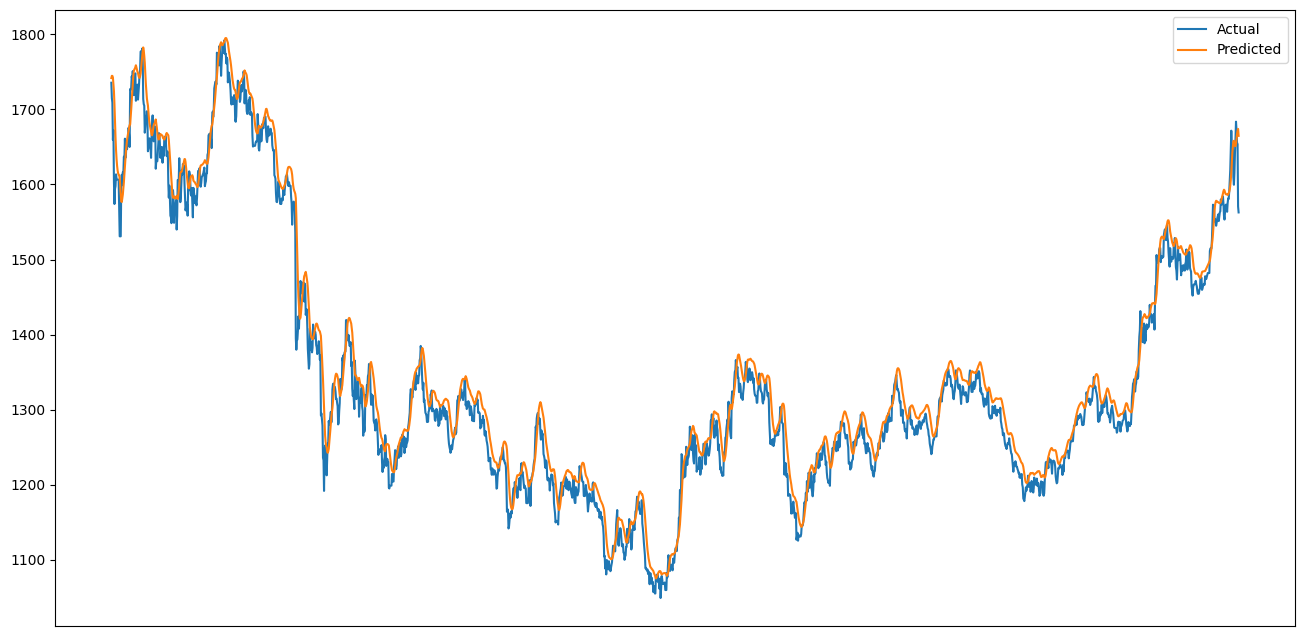

In [23]:
df = pd.read_csv("gold_price_data.csv")

train_size = int(len(df) * 0.8)
train = df[0:train_size]
test = df[train_size:len(df)]

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['Value'].values.reshape(-1, 1))

lookback = 50

def create_sequences(data, lookback):
    X = []
    y = []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X_train, y_train = create_sequences(train_scaled, lookback)

model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), activation='tanh'))
model.add(Dense(1))

learning_rate = 0.000183
batch_size = 32

optimizer = keras.optimizers.Adam(lr=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error')

model.fit(X_train, y_train, epochs=7, batch_size=batch_size)

inputs = df['Value'].values[len(df) - len(test) - lookback:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test, y_test = create_sequences(inputs, lookback)

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

mape = np.mean(np.abs((test['Value'].values - predictions) / test['Value'].values)) * 100
print("MAPE:", mape)

plt.figure(figsize=(16,8))
plt.plot(test['Value'].values)
plt.plot(predictions)
plt.legend(['Actual', 'Predicted'])
plt.xticks([]) 
plt.show()


In [24]:
print("MAPE:", mape)
print('Naive MAPE:', naive_mape)
print('Average MAPE:', avg_mape)
print('SES MAPE:', ses_mape)

MAPE: 13.653001699237805
Naive MAPE: 37.83942784126634
Average MAPE: 68.33811776692616
SES MAPE: 37.85995461065483
